In [5]:
import numpy as np
import sys
sys.path.append('..')  # Add parent directory to the sys.path
from helperfunctions import sigmoid


In [6]:
class LogisticalRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize the sample(x) and the features(y) array
        num_samples, num_features = X.shape
        # initialize the weights array to zeroes of size num_features
        self.weights = np.zeros(num_features)
        self.bias = 0 # value of bias
        for i in range(0, self.n_iters):
            predicted = np.dot(X, self.weights) + self.bias #calculating our initail prediction
            # applying the sigmoid function to our prediction to get the probability 
            y_predicted = sigmoid(predicted)
            #caluclating the gradient to determine the direction of the weights
            difference = y_predicted - y
            dw = (1 / num_samples) * np.dot(X.T, difference)
            db = (1 / num_samples) * np.sum(difference)
            # updating the weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self
    
    def predict(self, X):
        matmulans = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(matmulans)
        return [1 if i > 0.5 else 0 for i in y_predicted]

Testing the Logstical Regression Class


In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [12]:
# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=4)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (350, 1)
y_train shape: (350,)
X_test shape: (150, 1)
y_test shape: (150,)


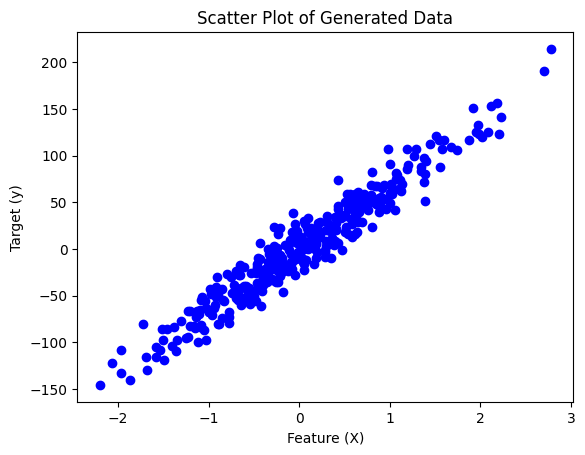

In [15]:
# Scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data points')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Generated Data')

# Display the plot
plt.show()

In [17]:
logiR = LogisticalRegression()
logiR.fit(X_train, y_train)
predictions = logiR.predict(X_test)
print(predictions)

[0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [18]:
logiR.bias

31.651793979302195

In [19]:
logiR.weights

array([510.2509219])

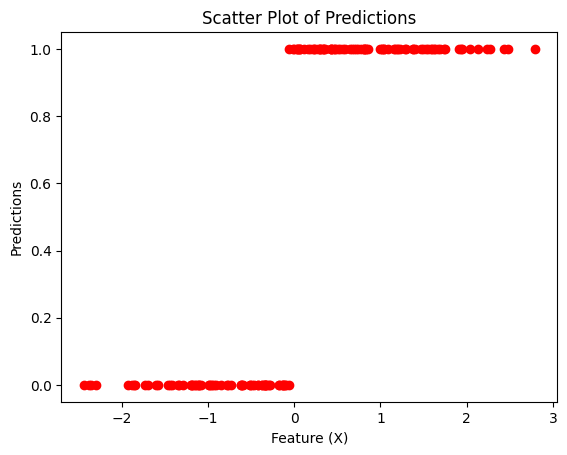

In [27]:
# Scatter plot of the data points
plt.scatter(X_test, predictions, color='red', marker='o', label='Predictions')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Predictions')
plt.title('Scatter Plot of Predictions')

# Display the plot
plt.show()


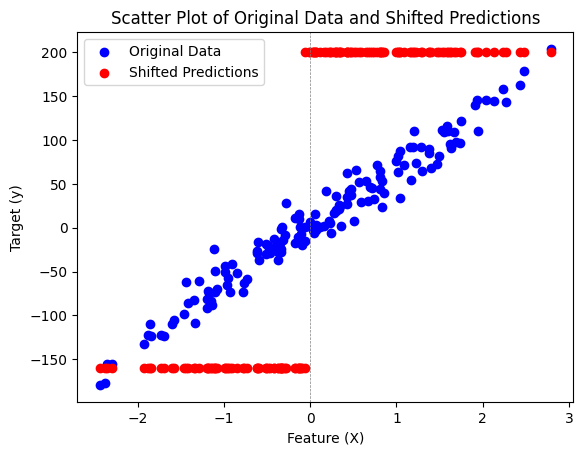

In [35]:


# Scatter plot of the original data points
plt.scatter(X_test, y_test, color='blue', marker='o', label='Original Data')

# Shift the predictions with value 0 by -160 and predictions with value 1 by +200
shifted_predictions = [pred * 360 - 160 for pred in predictions]

# Scatter plot of the shifted predictions
plt.scatter(X_test, shifted_predictions, color='red', marker='o', label='Shifted Predictions')

# Add a faint dotted line passing through zero of the x-axis
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Original Data and Shifted Predictions')

# Add legend
plt.legend()

# Display the plot
plt.show()
